In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
% matplotlib inline

In [2]:
dataA = np.loadtxt('./classification_data_HWK1/classification_data_HWK1/classificationA.train')
xAraw = dataA[:, 0:2]
yA = dataA[:, 2]

dataB = np.loadtxt('./classification_data_HWK1/classification_data_HWK1/classificationB.train')
xBraw = dataB[:, 0:2]
yB = dataB[:, 2]

dataC = np.loadtxt('./classification_data_HWK1/classification_data_HWK1/classificationC.train')
xCraw = dataC[:, 0:2]
yC = dataC[:, 2]

In [3]:
def designMatrixPreproc(X): #centering and normalizing the Nx2 design matrix X
    meanX = np.mean(X,axis=0)
    Xcent = X - meanX
    stdX = np.std(Xcent, axis=0)
    newX = Xcent/stdX
    return newX

In [4]:
xA =designMatrixPreproc(xAraw)
xB =designMatrixPreproc(xBraw)
xC =designMatrixPreproc(xCraw)

In [6]:
def MLEestimators(x, y):
    N = np.size(y)
    N1 = np.size(y[y==1])
    pi = N1/N
    x1 = x[y==1]
    x0 = x[y==0]
    mu1 = np.sum(x1, axis=0)/N1
    mu0 = np.sum(x0, axis=0)/(N-N1)
    x1mat = [np.dot(np.transpose([x1[i] - mu1]), [x1[i] - mu1]) for i in range(N1)] 
    #notice that x[i] is a row vector, not a column vector as in the MLE expressions derived in the pdf document
    x0mat = [np.dot(np.transpose([x0[i] - mu0]), [x0[i] - mu0]) for i in range(N - N1)]
    sigma = np.mean(np.concatenate((x1mat, x0mat)), axis=0)
    return pi, [mu0, mu1], sigma

In [7]:
piA, muA, sigmaA = MLEestimators(xA, yA)
print("piA=", piA)
print("muA=", muA)
print("sigmaA=", sigmaA)

piA= 0.3333333333333333
muA= [array([ 0.60826506, -0.51411204]), array([-1.21653013,  1.02822407])]
sigmaA= [[ 0.26002722 -0.32370936]
 [-0.32370936  0.47137763]]
0.608265064501


In [8]:
def normal(x, mu, sigma):
    #returns the image of x by the normal function of mean mu and covariance sigma
    scal = (np.dot(np.dot([x-mu], np.linalg.inv(sigma)), np.transpose([x-mu])))[0][0]
    return (np.exp(-scal/2.)/math.sqrt(2*math.pi*np.linalg.det(sigma)))

In [9]:
def sigmoidPar(pi, mu, sigma):
    #returns w and b such that p(y=1|x) = sigmoid(w^Tx +b)
    mu0=np.transpose([mu[0]])
    mu1=np.transpose([mu[1]])
    invsigma=np.linalg.inv(sigma)
    w=np.dot(invsigma, mu1 - mu0)
    b=(np.dot(np.dot(np.transpose(mu0), invsigma), mu0) - np.dot(np.dot(np.transpose(mu1), invsigma), mu1))[0][0]
    b=b/2. - math.log((1-pi)/pi)
    return w, b

In [57]:
wA, bA = sigmoidPar(piA, muA, sigmaA)

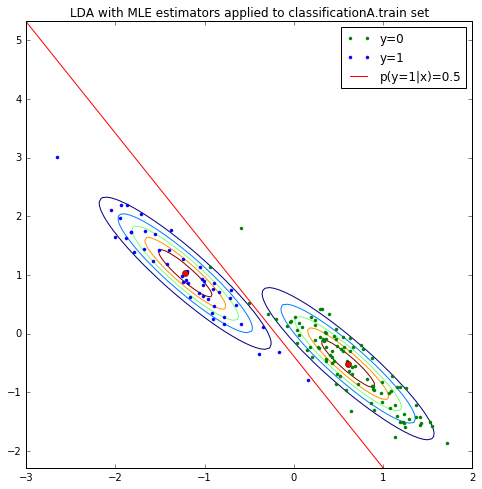

In [11]:
#Let us plot our results for the classificationA.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xA[yA==0][:, 0], xA[yA==0][:, 1], "g.")
points1, = plt.plot(xA[yA==1][:, 0], xA[yA==1][:, 1], "b.")
x = np.arange(-3.0, 2.0, 1)
y = -(bA + wA[0][0]*x)/wA[1][0]
border = plt.plot(x, y, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.plot(muA[0][0], muA[0][1], "ro")
plt.plot(muA[1][0], muA[1][1], "ro")


xgrid , ygrid = np.meshgrid(np.linspace(-3,2, 100),np.linspace(-2,4, 100))
zgrid = np.array([[normal([xgrid[i, j], ygrid[i ,j]], muA[0], sigmaA) for j in range(len(xgrid))] for i in range(len(xgrid))], dtype='float64')
plt.contour(xgrid,ygrid,zgrid,5)

zgrid = np.array([[normal([xgrid[i, j], ygrid[i ,j]], muA[1], sigmaA) for j in range(len(xgrid))] for i in range(len(xgrid))], dtype='float64')
plt.contour(xgrid,ygrid,zgrid,5)

plt.title("LDA with MLE estimators applied to classificationA.train set")

plt.show()

In [12]:
piB, muB, sigmaB = MLEestimators(xB, yB)
wB, bB = sigmoidPar(piB, muB, sigmaB)


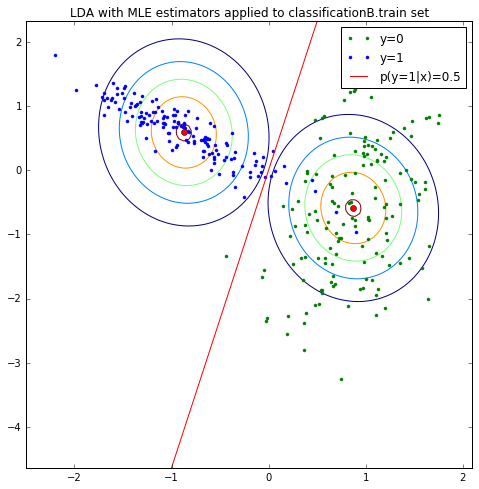

In [13]:
#Let us plot our results for the classificationB.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xB[yB==0][:, 0], xB[yB==0][:, 1], "g.")
points1, = plt.plot(xB[yB==1][:, 0], xB[yB==1][:, 1], "b.")
x = np.arange(-2.5, 2.0, 0.5)
y = -(bB + wB[0][0]*x)/wB[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<3 and y[i]>-5)]
ys = [y[i] for i in range(len(y)) if (y[i]<3 and y[i]>-5)]
border = plt.plot(xs, ys, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.plot(muB[0][0], muB[0][1], "ro")
plt.plot(muB[1][0], muB[1][1], "ro")


xgrid , ygrid = np.meshgrid(np.linspace(-2.5,2.1, 100),np.linspace(-4,2.1, 100))
zgrid = np.array([[normal([xgrid[i, j], ygrid[i ,j]], muB[0], sigmaB) for j in range(len(xgrid))] for i in range(len(xgrid))], dtype='float64')
plt.contour(xgrid,ygrid,zgrid,5)

zgrid = np.array([[normal([xgrid[i, j], ygrid[i ,j]], muB[1], sigmaB) for j in range(len(xgrid))] for i in range(len(xgrid))], dtype='float64')
plt.contour(xgrid,ygrid,zgrid,5)

plt.title("LDA with MLE estimators applied to classificationB.train set")
plt.show()

In [58]:
piC, muC, sigmaC = MLEestimators(xC, yC)
wC, bC = sigmoidPar(piC, muC, sigmaC)

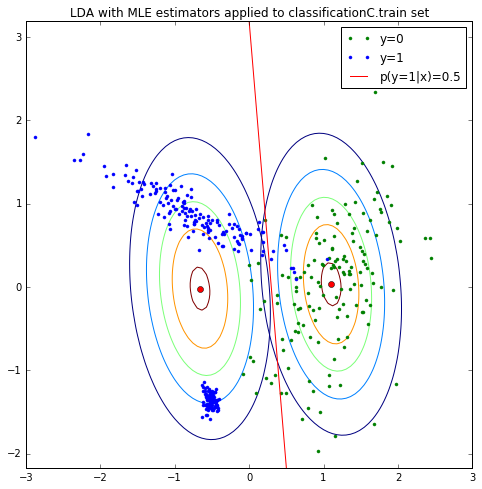

In [16]:
#Let us plot our results for the classificationC.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xC[yC==0][:, 0], xC[yC==0][:, 1], "g.")
points1, = plt.plot(xC[yC==1][:, 0], xC[yC==1][:, 1], "b.")
x = np.arange(-3.0, 3.0, 0.5)
y = -(bC + wC[0][0]*x)/wC[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<4 and y[i]>-4)]
ys = [y[i] for i in range(len(y)) if (y[i]<4 and y[i]>-4)]
border = plt.plot(xs, ys, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.plot(muC[0][0], muC[0][1], "ro")
plt.plot(muC[1][0], muC[1][1], "ro")


xgrid , ygrid = np.meshgrid(np.linspace(-3,3, 100),np.linspace(-2,2.5, 100))
zgrid = np.array([[normal([xgrid[i, j], ygrid[i ,j]], muC[0], sigmaC) for j in range(len(xgrid))] for i in range(len(xgrid))], dtype='float64')
plt.contour(xgrid,ygrid,zgrid,5)

zgrid = np.array([[normal([xgrid[i, j], ygrid[i ,j]], muC[1], sigmaC) for j in range(len(xgrid))] for i in range(len(xgrid))], dtype='float64')
plt.contour(xgrid,ygrid,zgrid,5)

plt.title("LDA with MLE estimators applied to classificationC.train set")
plt.show()

### Logistic Regression

In [17]:
def sigmoid1(x,w): #x and w are dx1 matrices
    z=(np.dot(np.transpose(w), x))[0][0]
    tmp=1+np.exp(-z)
    return 1./tmp

In [92]:
def IRLS(X, Y, iter): #X is a Nx2 matrix (the desing matrix) and y is Nx1 matrices, iter is the number of iterations
    N = len(Y)
    Xs = np.concatenate((X,np.ones((N,1))), axis=1) #we had a 1 coordinate in order to work with w^Tx instead of w^Tx + b
    w  = np.random.rand(3,1) #we intialize w with random coordinates between 0 and 1, w is 3x1, because the last coordinate beeing b
    for t in range(iter):
        #let us generate D_eta
        eta=[sigmoid1(np.transpose([x]), w) for x in Xs]
        diag = [e*(1-e) for e in eta]
        D = np.diag(diag)
        tmp = np.dot(np.dot(np.linalg.inv(np.dot(np.dot(np.transpose(Xs), D), Xs)), np.transpose(Xs)), np.transpose([Y-eta]))
        w = w + tmp
    return [w[0], w[1]], w[2] #w[2] is b

#### ClassificationA.train

In [90]:
wAlog, bAlog = IRLS(xA, yA, 12)
print("wA for logistic regression (estimated with IRLS):", [wAlog[0][0], wAlog[1][0]])
print("bA for logistic regression (estimated with IRLS):", bAlog[0])

wA for logistic regression (estimated with IRLS): [-316.3458626004728, -203.52910833854457]
bA for logistic regression (estimated with IRLS): -69.770101149


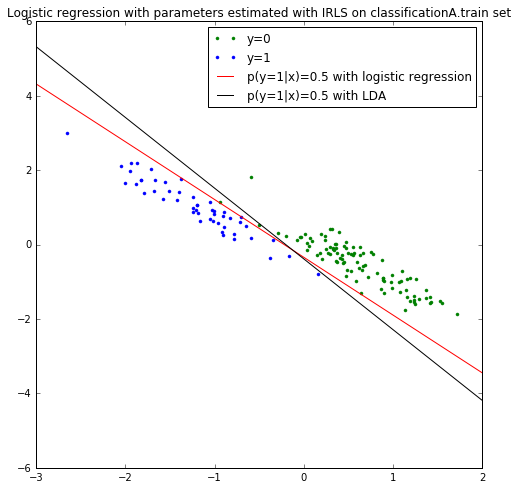

In [84]:
#Let us plot our results for the classificationA.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xA[yA==0][:, 0], xA[yA==0][:, 1], "g.")
points1, = plt.plot(xA[yA==1][:, 0], xA[yA==1][:, 1], "b.")
x = np.arange(-3.0, 3.0, 1)
y = -(bAlog + wAlog[0][0]*x)/wAlog[1][0]
border = plt.plot(x, y, "r")
y = -(bA + wA[0][0]*x)/wA[1][0]
plt.plot(x, y, "k")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5 with logistic regression", "p(y=1|x)=0.5 with LDA"])

plt.title("Logistic regression with parameters estimated with IRLS on classificationA.train set")
plt.show()

#### ClassificationB.train

In [93]:
wBlog, bBlog = IRLS(xB, yB, 10)
print("wB for logistic regression (estimated with IRLS):", [wBlog[0][0], wBlog[1][0]])
print("bB for logistic regression (estimated with IRLS):", bBlog[0])

wB for logistic regression (estimated with IRLS): [-6.4020807971591038, 1.6691986954691451]
bB for logistic regression (estimated with IRLS): 1.37063239658


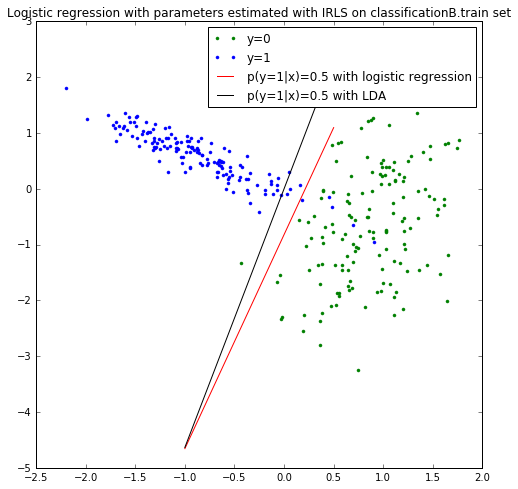

In [86]:
#Let us plot our results for the classificationB.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xB[yB==0][:, 0], xB[yB==0][:, 1], "g.")
points1, = plt.plot(xB[yB==1][:, 0], xB[yB==1][:, 1], "b.")
x = np.arange(-3, 3.0, 0.5)

y = -(bBlog + wBlog[0][0]*x)/wBlog[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<3 and y[i]>-5)]
ys = [y[i] for i in range(len(y)) if (y[i]<3 and y[i]>-5)]
plt.plot(xs, ys, "r")

y = -(bB + wB[0][0]*x)/wB[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<3 and y[i]>-5)]
ys = [y[i] for i in range(len(y)) if (y[i]<3 and y[i]>-5)]
plt.plot(xs, ys, "k")

plt.legend(["y=0", "y=1", "p(y=1|x)=0.5 with logistic regression", "p(y=1|x)=0.5 with LDA"])

plt.title("Logistic regression with parameters estimated with IRLS on classificationB.train set")
plt.show()

#### ClassificationC.train

In [94]:
wClog, bClog = IRLS(xC, yC, 10)
print("wC for logistic regression (estimated with IRLS):", [wClog[0][0], wClog[1][0]])
print("bC for logistic regression (estimated with IRLS):", bClog[0])

wC for logistic regression (estimated with IRLS): [-7.1698383660731748, 1.6178204256821842]
bC for logistic regression (estimated with IRLS): 2.05559858496


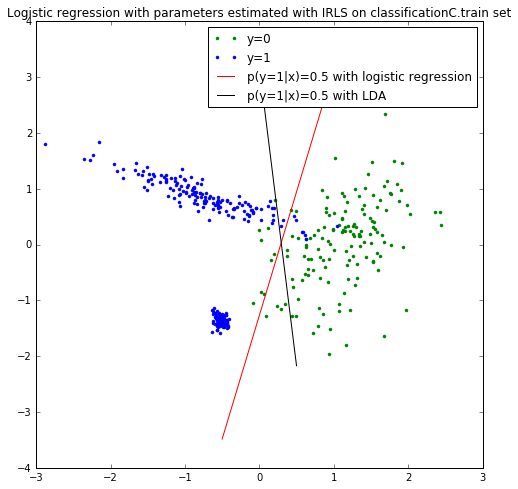

In [88]:
#Let us plot our results for the classificationC.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xC[yC==0][:, 0], xC[yC==0][:, 1], "g.")
points1, = plt.plot(xC[yC==1][:, 0], xC[yC==1][:, 1], "b.")

x = np.arange(-3.0, 3.0, 0.5)

y = -(bClog + wClog[0][0]*x)/wClog[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<4 and y[i]>-4)]
ys = [y[i] for i in range(len(y)) if (y[i]<4 and y[i]>-4)]
plt.plot(xs, ys, "r")

y = -(bC + wC[0][0]*x)/wC[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<4 and y[i]>-4)]
ys = [y[i] for i in range(len(y)) if (y[i]<4 and y[i]>-4)]
plt.plot(xs, ys, "k")

plt.legend(["y=0", "y=1", "p(y=1|x)=0.5 with logistic regression", "p(y=1|x)=0.5 with LDA"])

plt.title("Logistic regression with parameters estimated with IRLS on classificationC.train set")
plt.show()

### Linear regression

In [26]:
def linearRegressionEstimator(X, Y):
    N = len(Y)
    Xs = np.concatenate((X,np.ones((N,1))), axis=1) #we add a 1 coordinate in order to work with w^Tx instead of w^Tx + b
    w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(Xs), Xs)), np.transpose(Xs)), np.transpose([Y]))
    sigma2=(np.linalg.norm([Y] - np.dot(np.transpose(w), np.transpose(Xs)))**2)/N
    return [w[0], w[1]], w[2], sigma2

In [104]:
wAlin, bAlin, sigma2Alin = linearRegressionEstimator(xA, yA)
print("w for linear regression on train set A:", wAlin)
print("b for linear regression on train set A:", bAlin)
print("sigma2 for linear regression on train set A:", sigma2Alin)
wBlin, bBlin, sigma2Blin = linearRegressionEstimator(xB, yB)
print("w for linear regression on train set B:", wBlin)
print("b for linear regression on train set B:", bBlin)
print("sigma2 for linear regression on train set B:", sigma2Blin)
wClin, bClin, sigma2Clin = linearRegressionEstimator(xC, yC)
print("w for linear regression on train set C:", wClin)
print("b for linear regression on train set C:", bClin)
print("sigma2 for linear regression on train set C:", sigma2Clin)

w for linear regression on train set A: [array([-0.80904298]), array([-0.42515543])]
b for linear regression on train set A: [ 0.33333333]
sigma2 for linear regression on train set A: 0.039865517973
w for linear regression on train set B: [array([-0.39138826]), array([ 0.0844413])]
b for linear regression on train set B: [ 0.5]
sigma2 for linear regression on train set B: 0.0542640826895
w for linear regression on train set C: [array([-0.41554424]), array([-0.0387799])]
b for linear regression on train set C: [ 0.625]
sigma2 for linear regression on train set C: 0.0622499809375


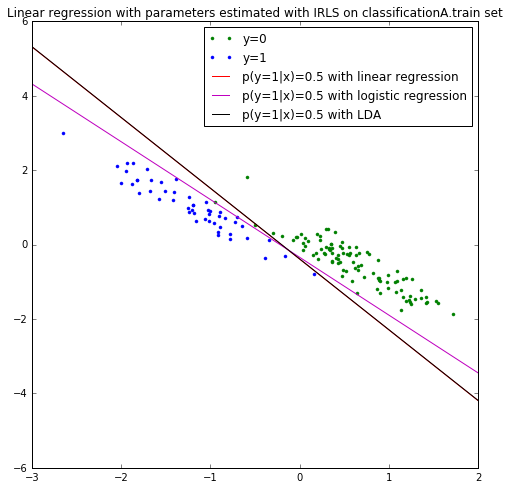

In [59]:
plt.figure(figsize=(8,8))
points0, = plt.plot(xA[yA==0][:, 0], xA[yA==0][:, 1], "g.")
points1, = plt.plot(xA[yA==1][:, 0], xA[yA==1][:, 1], "b.")
x = np.arange(-3.0, 3.0, 1)

y = -(bAlin -0.5 + wAlin[0][0]*x)/wAlin[1][0]
plt.plot(x, y, "r")
y = -(bAlog + wAlog[0][0]*x)/wAlog[1][0]
plt.plot(x, y, "m")
y = -(bA + wA[0][0]*x)/wA[1][0]
plt.plot(x, y, "k")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5 with linear regression", 
            "p(y=1|x)=0.5 with logistic regression", "p(y=1|x)=0.5 with LDA"])

plt.title("Linear regression with parameters estimated with IRLS on classificationA.train set")
plt.show()

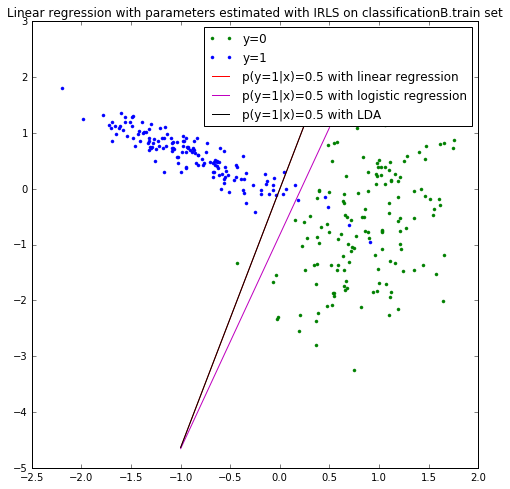

In [60]:
#Let us plot our results for the classificationB.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xB[yB==0][:, 0], xB[yB==0][:, 1], "g.")
points1, = plt.plot(xB[yB==1][:, 0], xB[yB==1][:, 1], "b.")
x = np.arange(-3, 3.0, 0.5)

y = -(bBlin - 0.5 + wBlin[0][0]*x)/wBlin[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<3 and y[i]>-5)]
ys = [y[i] for i in range(len(y)) if (y[i]<3 and y[i]>-5)]
plt.plot(xs, ys, "r")

y = -(bBlog + wBlog[0][0]*x)/wBlog[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<3 and y[i]>-5)]
ys = [y[i] for i in range(len(y)) if (y[i]<3 and y[i]>-5)]
plt.plot(xs, ys, "m")

y = -(bB + wB[0][0]*x)/wB[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<3 and y[i]>-5)]
ys = [y[i] for i in range(len(y)) if (y[i]<3 and y[i]>-5)]
plt.plot(xs, ys, "k")

plt.legend(["y=0", "y=1", "p(y=1|x)=0.5 with linear regression", 
            "p(y=1|x)=0.5 with logistic regression", "p(y=1|x)=0.5 with LDA"])
plt.title("Linear regression with parameters estimated with IRLS on classificationB.train set")
plt.show()

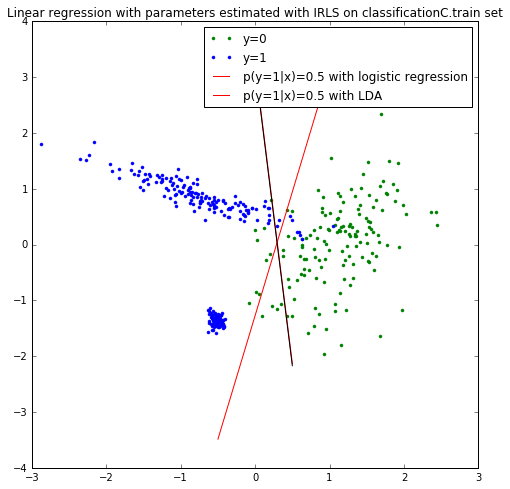

In [61]:
#Let us plot our results for the classificationC.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xC[yC==0][:, 0], xC[yC==0][:, 1], "g.")
points1, = plt.plot(xC[yC==1][:, 0], xC[yC==1][:, 1], "b.")

x = np.arange(-3.0, 3.0, 0.5)

y = -(bClin -0.5 + wClin[0][0]*x)/wClin[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<4 and y[i]>-4)]
ys = [y[i] for i in range(len(y)) if (y[i]<4 and y[i]>-4)]
plt.plot(xs, ys, "r")

y = -(bClog + wClog[0][0]*x)/wClog[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<4 and y[i]>-4)]
ys = [y[i] for i in range(len(y)) if (y[i]<4 and y[i]>-4)]
plt.plot(xs, ys, "r")

y = -(bC + wC[0][0]*x)/wC[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<4 and y[i]>-4)]
ys = [y[i] for i in range(len(y)) if (y[i]<4 and y[i]>-4)]
plt.plot(xs, ys, "k")

plt.legend(["y=0", "y=1", "p(y=1|x)=0.5 with logistic regression", "p(y=1|x)=0.5 with LDA"])

plt.title("Linear regression with parameters estimated with IRLS on classificationC.train set")
plt.show()

## Comparing the models

In [31]:
dataAtest = np.loadtxt('./classification_data_HWK1/classification_data_HWK1/classificationA.test')
xArawtest = dataAtest[:, 0:2]
yAtest = dataAtest[:, 2]

dataBtest = np.loadtxt('./classification_data_HWK1/classification_data_HWK1/classificationB.test')
xBrawtest = dataBtest[:, 0:2]
yBtest = dataBtest[:, 2]

dataCtest = np.loadtxt('./classification_data_HWK1/classification_data_HWK1/classificationC.test')
xCrawtest = dataCtest[:, 0:2]
yCtest = dataCtest[:, 2]

xAtest =designMatrixPreproc(xArawtest)
xBtest =designMatrixPreproc(xBrawtest)
xCtest =designMatrixPreproc(xCrawtest)

In [32]:
def classificationError(Ypred, Y):
    return np.mean([(Ypred[i]!=Y[i]) for i in range(len(Y))])

### LDA model

In [33]:
def sigmoid(x, w, b): #x and w are dx1 matrices
    z=(np.dot(np.transpose(w), x))[0][0] + b
    tmp=1+np.exp(-z)
    return 1./tmp

In [34]:
def LDApredict(X, pi, mu, sigma): 
    w, b = sigmoidPar(pi, mu, sigma)
    probs = [sigmoid(np.transpose([x]), w, b) for x in X]
    return [int(p>0.5) for p in probs]

Classification error on train set for A dataset : 0.0133333333333
Classification error on test set for A dataset : 0.0173333333333


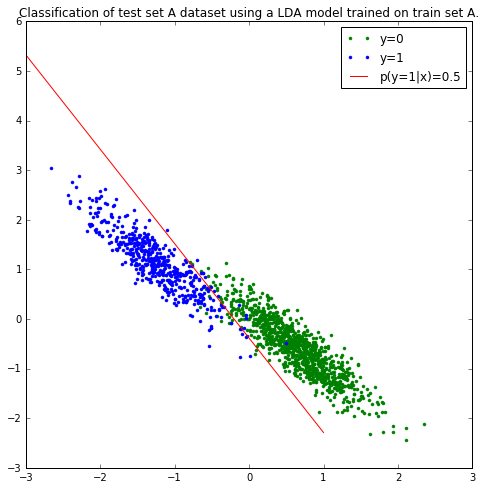

In [62]:
print("Classification error on train set for A dataset :", classificationError(LDApredict(xA, piA, muA, sigmaA), yA))
print("Classification error on test set for A dataset :", classificationError(LDApredict(xAtest, piA, muA, sigmaA), yAtest))
plt.figure(figsize=(8,8))
points0, = plt.plot(xAtest[yAtest==0][:, 0], xAtest[yAtest==0][:, 1], "g.")
points1, = plt.plot(xAtest[yAtest==1][:, 0], xAtest[yAtest==1][:, 1], "b.")
x = np.arange(-3.0, 2.0, 1)
y = -(bA + wA[0][0]*x)/wA[1][0]
border = plt.plot(x, y, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.title("Classification of test set A using a LDA model trained on train set A.")

Classification error on train set for B dataset : 0.03
Classification error on test set for B dataset : 0.0445


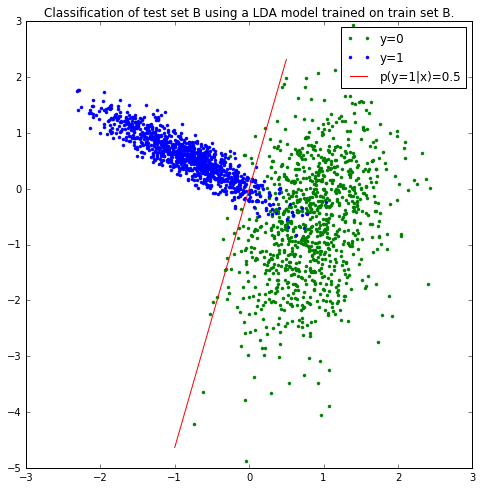

In [63]:
print("Classification error on train set for B dataset :", classificationError(LDApredict(xB, piB, muB, sigmaB), yB))
print("Classification error on test set for B dataset :", classificationError(LDApredict(xBtest, piB, muB, sigmaB), yBtest))
#Let us plot our results for the classificationB.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xBtest[yBtest==0][:, 0], xBtest[yBtest==0][:, 1], "g.")
points1, = plt.plot(xBtest[yBtest==1][:, 0], xBtest[yBtest==1][:, 1], "b.")
x = np.arange(-2.5, 2.0, 0.5)
y = -(bB + wB[0][0]*x)/wB[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<3 and y[i]>-5)]
ys = [y[i] for i in range(len(y)) if (y[i]<3 and y[i]>-5)]
border = plt.plot(xs, ys, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.title("Classification of test set B using a LDA model trained on train set B.")

Classification error on train set for C dataset : 0.055
Classification error on test set for C dataset : 0.0433333333333


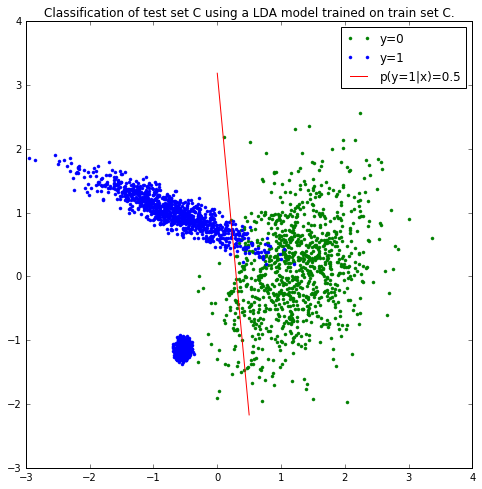

In [64]:
print("Classification error on train set for C dataset :", classificationError(LDApredict(xC, piC, muC, sigmaC), yC))
print("Classification error on test set for C dataset :", classificationError(LDApredict(xCtest, piC, muC, sigmaC), yCtest))
#Let us plot our results for the classificationC.test set
plt.figure(figsize=(8,8))
points0, = plt.plot(xCtest[yCtest==0][:, 0], xCtest[yCtest==0][:, 1], "g.")
points1, = plt.plot(xCtest[yCtest==1][:, 0], xCtest[yCtest==1][:, 1], "b.")
x = np.arange(-3.0, 3.0, 0.5)
y = -(bC + wC[0][0]*x)/wC[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<4 and y[i]>-4)]
ys = [y[i] for i in range(len(y)) if (y[i]<4 and y[i]>-4)]
border = plt.plot(xs, ys, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.title("Classification of test set C using a LDA model trained on train set C.")

### Logistic Regression

In [38]:
def LogPredict(X, w, b):
    probs = [sigmoid(np.transpose([x]), w, b) for x in X]
    return [int(p>0.5) for p in probs]

Classification error on train set for A dataset : 0.0
Classification error on test set for A dataset : 0.0406666666667


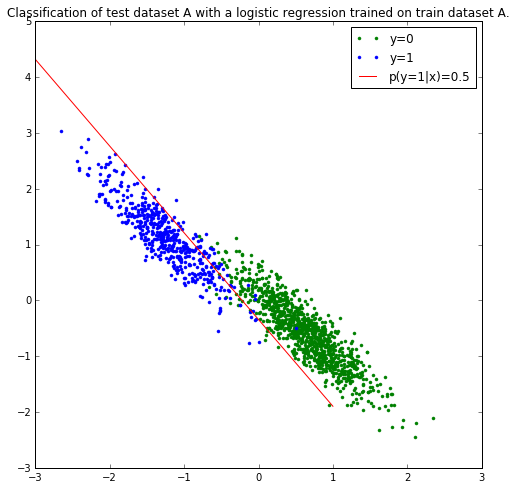

In [95]:
print("Classification error on train set for A dataset :", classificationError(LogPredict(xA, wAlog, bAlog), yA))
print("Classification error on test set for A dataset :", classificationError(LogPredict(xAtest, wAlog, bAlog), yAtest))
plt.figure(figsize=(8,8))
points0, = plt.plot(xAtest[yAtest==0][:, 0], xAtest[yAtest==0][:, 1], "g.")
points1, = plt.plot(xAtest[yAtest==1][:, 0], xAtest[yAtest==1][:, 1], "b.")
x = np.arange(-3.0, 2.0, 1)
y = -(bAlog + wAlog[0][0]*x)/wAlog[1][0]
border = plt.plot(x, y, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.title("Classification of test dataset A with a logistic regression trained on train dataset A.")

Classification error on train set for B dataset : 0.02
Classification error on test set for B dataset : 0.042


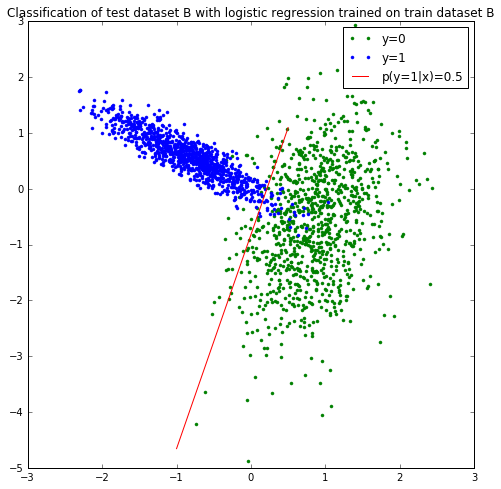

In [40]:
print("Classification error on train set for B dataset :", classificationError(LogPredict(xB, wBlog, bBlog), yB))
print("Classification error on test set for B dataset :", classificationError(LogPredict(xBtest, wBlog, bBlog), yBtest))
#Let us plot our results for the classificationB.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xBtest[yBtest==0][:, 0], xBtest[yBtest==0][:, 1], "g.")
points1, = plt.plot(xBtest[yBtest==1][:, 0], xBtest[yBtest==1][:, 1], "b.")
x = np.arange(-2.5, 2.0, 0.5)
y = -(bBlog + wBlog[0][0]*x)/wBlog[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<3 and y[i]>-5)]
ys = [y[i] for i in range(len(y)) if (y[i]<3 and y[i]>-5)]
border = plt.plot(xs, ys, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.title("Classification of test dataset B with logistic regression trained on train dataset B")

Classification error on train set for C dataset : 0.04
Classification error on test set for C dataset : 0.0246666666667


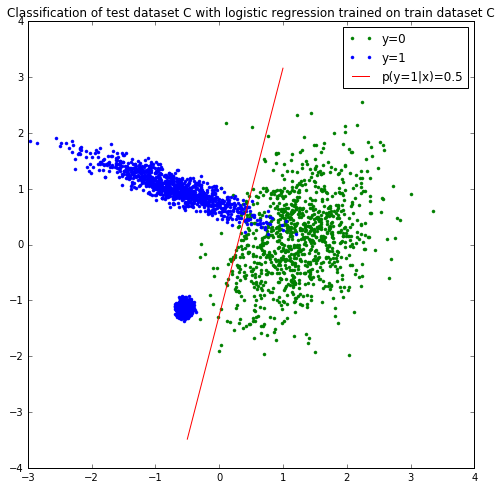

In [41]:
print("Classification error on train set for C dataset :", classificationError(LogPredict(xC, wClog, bClog), yC))
print("Classification error on test set for C dataset :", classificationError(LogPredict(xCtest, wClog, bClog), yCtest))
#Let us plot our results for the classificationC.test set
plt.figure(figsize=(8,8))
points0, = plt.plot(xCtest[yCtest==0][:, 0], xCtest[yCtest==0][:, 1], "g.")
points1, = plt.plot(xCtest[yCtest==1][:, 0], xCtest[yCtest==1][:, 1], "b.")
x = np.arange(-3.0, 3.0, 0.5)
y = -(bClog + wClog[0][0]*x)/wClog[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<4 and y[i]>-4)]
ys = [y[i] for i in range(len(y)) if (y[i]<4 and y[i]>-4)]
border = plt.plot(xs, ys, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.title("Classification of test dataset C with logistic regression trained on train dataset C")

### Linear regression

In [42]:
def LinPredict(X, w, b, sigma2):
    ypred= [np.dot(np.transpose(w),np.transpose([x])) + b + np.random.normal(0, sigma2, 1)[0] for x in X]
    return [int(y>0.5) for y in ypred]

Classification error on train set for A dataset : 0.0133333333333
Classification error on test set for A dataset : 0.0233333333333


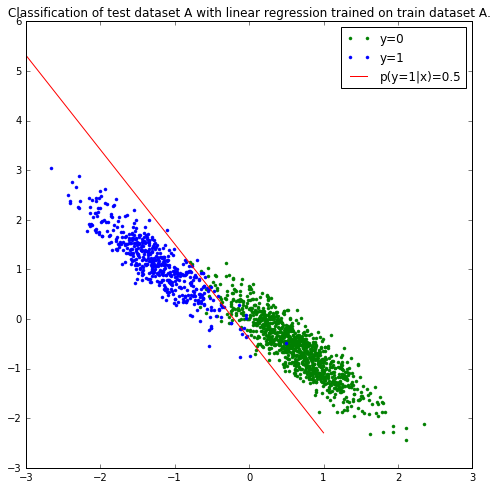

In [65]:
print("Classification error on train set for A dataset :", classificationError(LinPredict(xA, wAlin, bAlin, sigma2Alin), yA))
print("Classification error on test set for A dataset :", classificationError(LinPredict(xAtest, wAlin, bAlin, sigma2Alin), yAtest))
plt.figure(figsize=(8,8))
points0, = plt.plot(xAtest[yAtest==0][:, 0], xAtest[yAtest==0][:, 1], "g.")
points1, = plt.plot(xAtest[yAtest==1][:, 0], xAtest[yAtest==1][:, 1], "b.")
x = np.arange(-3.0, 2.0, 1)
y = -(bAlin - 0.5 + wAlin[0][0]*x)/wAlin[1][0]
border = plt.plot(x, y, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.title("Classification of test dataset A with linear regression trained on train dataset A.")

Classification error on train set for B dataset : 0.03
Classification error on test set for B dataset : 0.0425


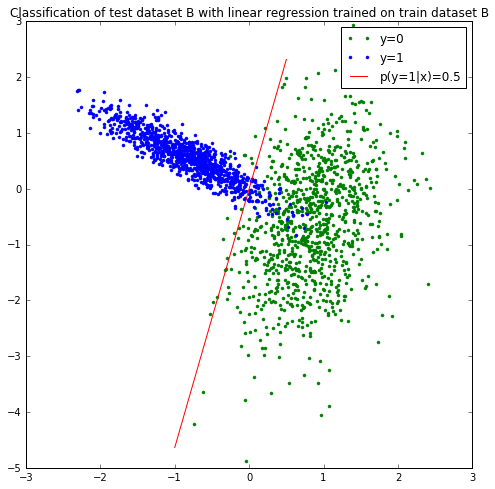

In [66]:
print("Classification error on train set for B dataset :", classificationError(LinPredict(xB, wBlin, bBlin, sigma2Blin), yB))
print("Classification error on test set for B dataset :", classificationError(LinPredict(xBtest, wBlin, bBlin, sigma2Blin), yBtest))
#Let us plot our results for the classificationB.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xBtest[yBtest==0][:, 0], xBtest[yBtest==0][:, 1], "g.")
points1, = plt.plot(xBtest[yBtest==1][:, 0], xBtest[yBtest==1][:, 1], "b.")
x = np.arange(-2.5, 2.0, 0.5)
y = -(bBlin -0.5 + wBlin[0][0]*x)/wBlin[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<3 and y[i]>-5)]
ys = [y[i] for i in range(len(y)) if (y[i]<3 and y[i]>-5)]
border = plt.plot(xs, ys, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.title("Classification of test dataset B with linear regression trained on train dataset B")

Classification error on train set for C dataset : 0.055
Classification error on test set for C dataset : 0.0436666666667


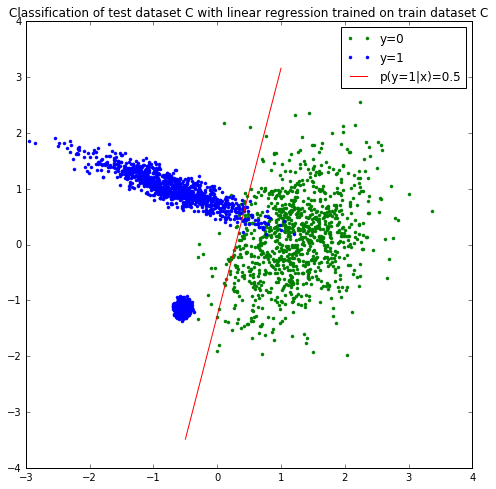

In [103]:
print("Classification error on train set for C dataset :", classificationError(LinPredict(xC, wClin, bClin, sigma2Clin), yC))
print("Classification error on test set for C dataset :", classificationError(LinPredict(xCtest, wClin, bClin, sigma2Clin), yCtest))
#Let us plot our results for the classificationC.test set
plt.figure(figsize=(8,8))
points0, = plt.plot(xCtest[yCtest==0][:, 0], xCtest[yCtest==0][:, 1], "g.")
points1, = plt.plot(xCtest[yCtest==1][:, 0], xCtest[yCtest==1][:, 1], "b.")
x = np.arange(-3.0, 3.0, 0.5)
y = -(bClog + wClog[0][0]*x)/wClog[1][0]
xs= [x[i] for i in range(len(x)) if (y[i]<4 and y[i]>-4)]
ys = [y[i] for i in range(len(y)) if (y[i]<4 and y[i]>-4)]
border = plt.plot(xs, ys, "r")
plt.legend(["y=0", "y=1", "p(y=1|x)=0.5"])
plt.title("Classification of test dataset C with linear regression trained on train dataset C")

### QDA model

In [46]:
def QDAMLEestimators(x, y):
    N = np.size(y)
    N1 = np.size(y[y==1])
    pi = N1/N
    x1 = x[y==1]
    x0 = x[y==0]
    mu1 = np.sum(x1, axis=0)/N1
    mu0 = np.sum(x0, axis=0)/(N-N1)
    x1mat = [np.dot(np.transpose([x1[i] - mu1]), [x1[i] - mu1]) for i in range(N1)] 
    #notice that x[i] is a row vector, not a column vector as in the MLE expressions derived in the pdf document
    x0mat = [np.dot(np.transpose([x0[i] - mu0]), [x0[i] - mu0]) for i in range(N - N1)]
    sigma0 = np.mean(x0mat, axis=0)
    sigma1 = np.mean(x1mat, axis=0)
    return pi, [mu0, mu1], [sigma0, sigma1]

In [68]:
piAqda, muAqda, sigmaAqda = QDAMLEestimators(xA, yA)
piBqda, muBqda, sigmaBqda = QDAMLEestimators(xB, yB)
piCqda, muCqda, sigmaCqda = QDAMLEestimators(xC, yC)

In [48]:
def conditionalConicEquation(x, pi, mu, sigma): #x is a 2x1 vector mu is [mu0, mu1] where mu0 and mu1 are 1x2 vectors
    #returns -z such as p(y=1|x) = sigmoid(z)
    sigma0 = sigma[0]
    sigma1 = sigma[1]
    mu0 = np.transpose([mu[0]])
    mu1 = np.transpose([mu[1]])
    tmp = (math.log((1-pi)*math.sqrt(np.linalg.det(sigma1)/np.linalg.det(sigma0))/pi)
           - 0.5*np.dot(np.dot(np.transpose(x), np.linalg.inv(sigma0)), x) 
           + 0.5*np.dot(np.dot(np.transpose(x), np.linalg.inv(sigma1)), x)
           + np.dot(np.dot(np.transpose(mu0), np.linalg.inv(sigma0)), x)
           - np.dot(np.dot(np.transpose(mu1), np.linalg.inv(sigma1)), x)
           -0.5*np.dot(np.dot(np.transpose(mu0), np.linalg.inv(sigma0)), mu0)
           +0.5*np.dot(np.dot(np.transpose(mu1), np.linalg.inv(sigma1)), mu1))
    return tmp[0][0]

In [49]:
def qdaPredict(X, pi, mu, sigma): #returns predicted label for the qda model with pi, mu,and sigma parameters
    tmp = [int((1/(1+math.exp(conditionalConicEquation(np.transpose([x]), pi, mu, sigma)))) > 0.5) for x in X]
    return tmp

###### Dataset A

In [69]:
print("piAqda =", piAqda)
print("muAqda =", muAqda)
print("sigmaAqda =", sigmaAqda)
print("Classification error for QDA model on train set for A dataset :", classificationError(qdaPredict(xA, piAqda, muAqda, sigmaAqda), yA))
print("Classification error for QDA model on test set for A dataset :", classificationError(qdaPredict(xAtest, piAqda, muAqda, sigmaAqda), yAtest))

piAqda = 0.3333333333333333
muAqda = [array([ 0.60826506, -0.51411204]), array([-1.21653013,  1.02822407])]
sigmaAqda = [array([[ 0.24605036, -0.29955696],
       [-0.29955696,  0.44221533]]), array([[ 0.28798095, -0.37201417],
       [-0.37201417,  0.52970223]])]
Classification error for QDA model on train set for A dataset : 0.00666666666667
Classification error for QDA model on test set for A dataset : 0.022


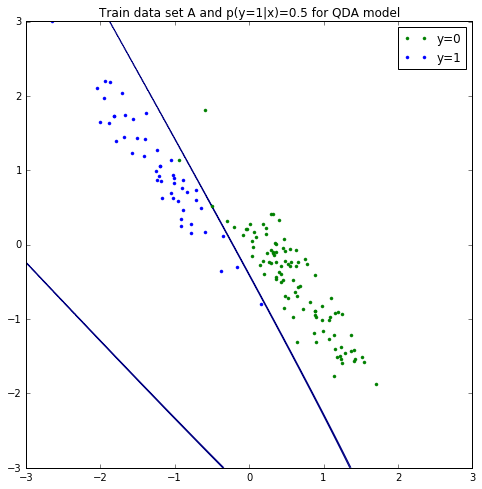

In [51]:
plt.figure(figsize=(8,8))
points0, = plt.plot(xA[yA==0][:, 0], xA[yA==0][:, 1], "g.")
points1, = plt.plot(xA[yA==1][:, 0], xA[yA==1][:, 1], "b.")

xgrid , ygrid = np.meshgrid(np.linspace(-3,3, 700),np.linspace(-3,3, 700))
zgrid = np.array([[math.fabs(conditionalConicEquation(np.transpose([[xgrid[i,j], ygrid[i,j]]]), piAqda, muAqda, sigmaAqda))
                   for j in range(len(xgrid))] for i in range(len(xgrid))], dtype='float64')
plt.contour(xgrid,ygrid,zgrid, [0.1]) #plotting the 0 livel set (corresponding to the actual conic equation) 
                                            #requires a great number of points on ou meshgrid
plt.legend(["y=0", "y=1"])
plt.title("Train data set A and p(y=1|x)=0.5 for QDA model")

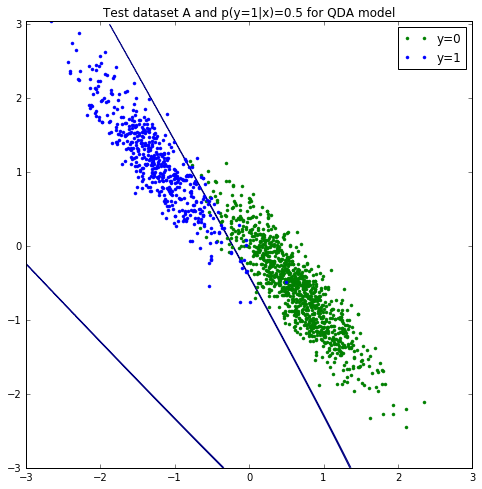

In [52]:
plt.figure(figsize=(8,8))
points0, = plt.plot(xAtest[yAtest==0][:, 0], xAtest[yAtest==0][:, 1], "g.")
points1, = plt.plot(xAtest[yAtest==1][:, 0], xAtest[yAtest==1][:, 1], "b.")

plt.contour(xgrid,ygrid,zgrid, [0.1]) #plotting the 0 livel set (corresponding to the actual conic equation) 
                                            #requires a great number of points on ou meshgrid
plt.legend(["y=0", "y=1"])
plt.title("Test dataset A and p(y=1|x)=0.5 for QDA model")

##### DatasetB

In [70]:
print("piBqda =", piBqda)
print("muBqda =", muBqda)
print("sigmaBqda =", sigmaBqda)
print("Classification error for QDA model on B train dataset :", classificationError(qdaPredict(xB, piBqda, muBqda, sigmaBqda), yB))
print("Classification error for QDA model on B test dataset :", classificationError(qdaPredict(xBtest, piBqda, muBqda, sigmaBqda), yBtest))

piBqda = 0.5
muBqda = [array([ 0.87327697, -0.58835525]), array([-0.87327697,  0.58835525])]
sigmaBqda = [array([[ 0.18011076,  0.17385184],
       [ 0.17385184,  1.11353805]]), array([[ 0.2946639 , -0.21801349],
       [-0.21801349,  0.19413815]])]
Classification error for QDA model on B train dataset : 0.0133333333333
Classification error for QDA model on B test dataset : 0.019


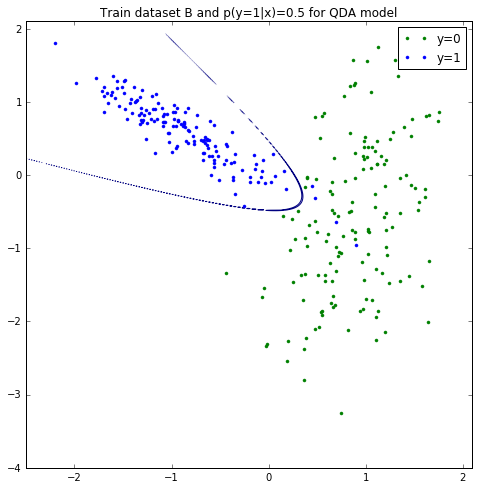

In [106]:
#Let us plot our results for the classificationB.train set
plt.figure(figsize=(8,8))
points0, = plt.plot(xB[yB==0][:, 0], xB[yB==0][:, 1], "g.")
points1, = plt.plot(xB[yB==1][:, 0], xB[yB==1][:, 1], "b.")

plt.legend(["y=0", "y=1"])

xgrid , ygrid = np.meshgrid(np.linspace(-2.5,2.1, 700),np.linspace(-4,2.1, 700))
zgrid = np.array([[math.fabs(conditionalConicEquation(np.transpose([[xgrid[i,j], ygrid[i,j]]]), piBqda, muBqda, sigmaBqda))
                   for j in range(len(xgrid))] for i in range(len(xgrid))], dtype='float64')
plt.contour(xgrid,ygrid,zgrid, [0.05]) #plotting the 0 livel set (corresponding to the actual conic equation) 
                                            #requires a great number of points on ou meshgrid
plt.title("Train dataset B and p(y=1|x)=0.5 for QDA model")

In [107]:
print("piCqda =", piCqda)
print("muCqda =", muCqda)
print("sigmaCqda =", sigmaCqda)
print("Classification error for QDA model on C train dataset :", classificationError(qdaPredict(xC, piCqda, muCqda, sigmaCqda), yC))
print("Classification error for QDA model on C test dataset :", classificationError(qdaPredict(xCtest, piCqda, muCqda, sigmaCqda), yCtest))

piCqda = 0.625
muCqda = [array([ 1.1015214 ,  0.03272764]), array([-0.66091284, -0.01963658])]
sigmaCqda = [array([[ 0.27376061,  0.16783529],
       [ 0.16783529,  0.56214274]]), array([[ 0.27092822, -0.23737129],
       [-0.23737129,  1.2616861 ]])]
Classification error for QDA model on C train dataset : 0.0525
Classification error for QDA model on C test dataset : 0.034


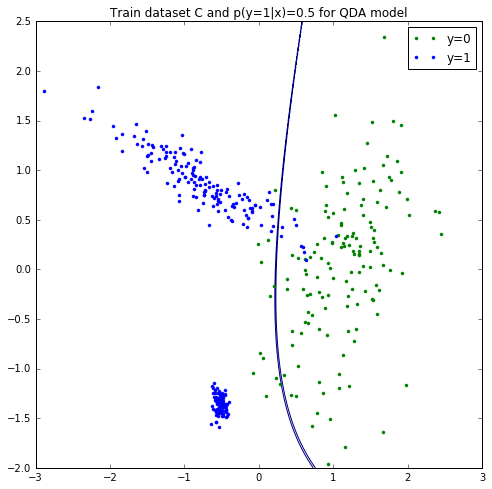

In [105]:
plt.figure(figsize=(8,8))
points0, = plt.plot(xC[yC==0][:, 0], xC[yC==0][:, 1], "g.")
points1, = plt.plot(xC[yC==1][:, 0], xC[yC==1][:, 1], "b.")

plt.legend(["y=0", "y=1"])



xgrid , ygrid = np.meshgrid(np.linspace(-3,3, 700),np.linspace(-2,2.5, 700))
zgrid = np.array([[math.fabs(conditionalConicEquation(np.transpose([[xgrid[i,j], ygrid[i,j]]]), piCqda, muCqda, sigmaCqda))
                   for j in range(len(xgrid))] for i in range(len(xgrid))], dtype='float64')
plt.contour(xgrid,ygrid,zgrid, [0.05]) #plotting the 0 livel set (corresponding to the actual conic equation) 
                                            #requires a great number of points on ou meshgrid
plt.title("Train dataset C and p(y=1|x)=0.5 for QDA model")